In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
plt.style.use('ggplot')
#from astroML.plotting import scatter_contour
import seaborn as sns
from scipy.stats import anderson_ksamp
from scipy.stats import ks_2samp
from scipy import ndimage

In [2]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/harrison.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_harrison = np.log10(central_tab.field('w80'))
log_L_OIII_harrison = central_tab.field('log_L_OIII')
outflow_size_harrison = np.array([12,10,14,16,6,10,9,8,6,14,13,6,6,11,9,7])
hdu.close()

In [3]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/sun.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_sun = np.log10(central_tab.field('w80'))
log_L_OIII_sun = central_tab.field('log_L_OIII')
hdu.close()

In [4]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/Liu.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_liu = np.log10(central_tab.field('w80'))
log_L_OIII_liu = central_tab.field('log_L_OIII')
outflow_size_liu = np.array([6.9,14.4,6.7,9.6,16.6,12.9,10.0,13.1,10.6,9.3,13.0,10.1,14.6,18.7])
hdu.close()

In [5]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/CARS.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_CARS = np.log10(central_tab.field('w80'))
log_L_OIII_CARS = central_tab.field('log_L_OIII')
log_L_Hb_blr_CARS = central_tab.field('log_Hb_lum')
hdu.close()

In [6]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/Mullaney.fits')
central_tab = hdu[1].data
central_columns = hdu[1].header
log_w80_mullaney = np.log10(central_tab.field('w80'))
log_L_OIII_mullaney = central_tab.field('log_L_OIII')
log_L_Hb_blr_mullaney = central_tab.field('log_L_Hb_blr')
hdu.close()

/home/rickeythecat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [7]:
select = (log_L_OIII_mullaney > 38) & (log_L_OIII_mullaney < 44) & (log_w80_mullaney >0)
log_w80_mullaney_good = log_w80_mullaney[select]
log_L_OIII_mullaney_good = log_L_OIII_mullaney[select]

/home/rickeythecat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [40]:
from scipy.stats import gaussian_kde
x = log_L_OIII_mullaney_good
y = log_w80_mullaney_good

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

In [8]:
#select = (log_L_Hb_blr_mullaney > 30) & (log_L_Hb_blr_mullaney < 44) & (log_w80_mullaney >0)
select = (log_L_Hb_blr_mullaney > 0) & (log_w80_mullaney >0)
log_w80_mullaney_good = log_w80_mullaney[select]
log_L_Hb_blr_mullaney_good = log_L_OIII_mullaney[select]
m = log_L_Hb_blr_mullaney_good


/home/rickeythecat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [16]:
from scipy.stats import gaussian_kde
m = log_L_Hb_blr_mullaney_good
n = log_w80_mullaney_good

mn = np.vstack([m,n])
o = gaussian_kde(mn)(mn)

# Sort the points by density, so that the densest points are plotted last
idx = o.argsort()
m, n, o = m[idx], n[idx], o[idx]

In [20]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(21/256, 1, N)
vals[:, 1] = np.linspace(33/256, 1, N)
vals[:, 2] = np.linspace(118/256, 1, N)
vals[:, 3] = np.linspace(121/256, 1, N)

cmap2 = ListedColormap(vals)
cmap = sns.cubehelix_palette(20, light=0.15,dark=0.95, as_cmap=True)


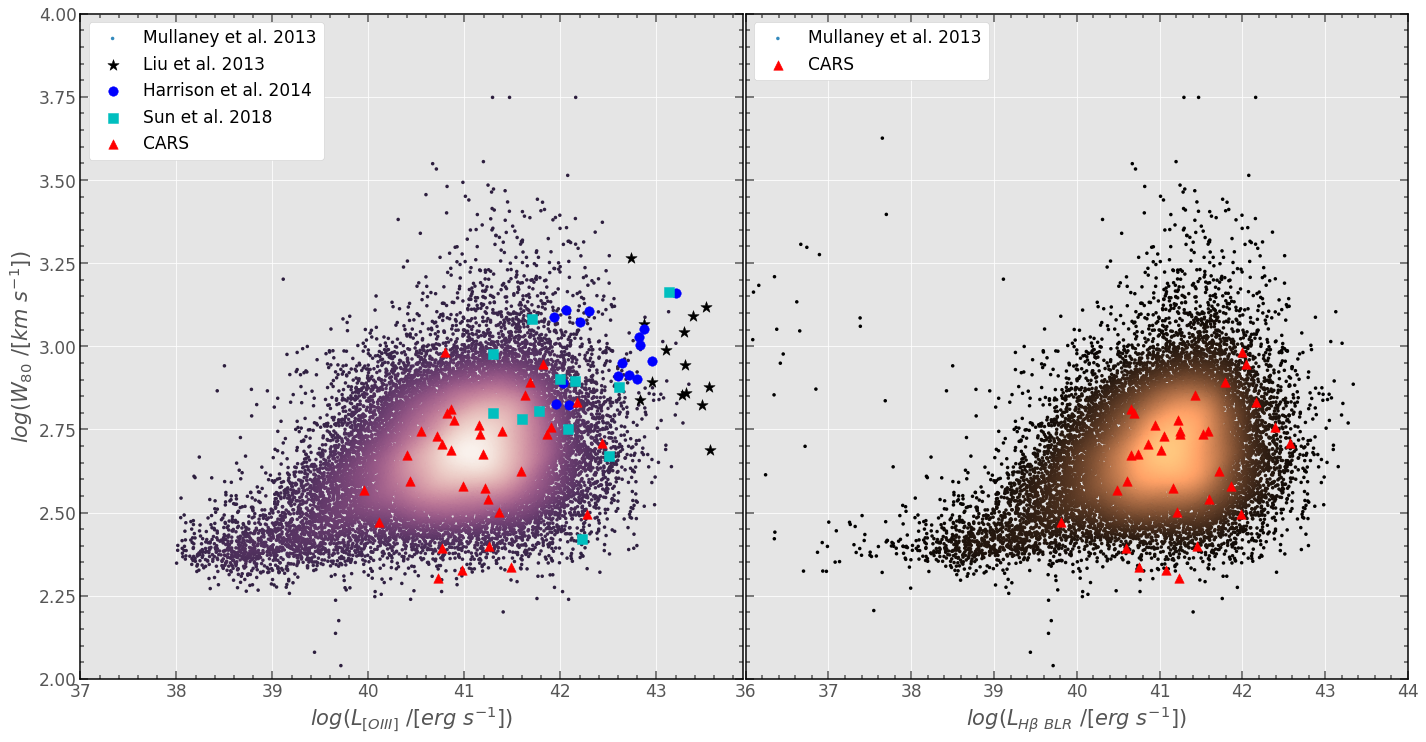

In [21]:
from matplotlib import gridspec

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
gs = gridspec.GridSpec(2,1, width_ratios=[1],height_ratios=[1,1]) 


fig = plt.figure(figsize=(20,11))
ax1 = fig.add_axes([0.06, 0.1, 0.46, 0.84]) # main axes
ax2 = fig.add_axes([0.522, 0.1, 0.46, 0.84]) # main axes

plt.setp(ax2.get_yticklabels(), visible=False)

ax1.scatter(x, y, c=z,s=50,marker='.',edgecolor='',alpha=1,cmap=cmap,label='Mullaney et al. 2013')
ax1.scatter(log_L_OIII_liu,log_w80_liu, color='k',marker='*',alpha=1, s=140,label='Liu et al. 2013')
ax1.scatter(log_L_OIII_harrison,log_w80_harrison, color='b',marker='o',alpha=1, s=90,label='Harrison et al. 2014')
ax1.scatter(log_L_OIII_sun,log_w80_sun,color='c',marker='s',alpha=1, s=90,label='Sun et al. 2018')
ax1.scatter(log_L_OIII_CARS,log_w80_CARS, color='r',marker='^',alpha=1, s=90,label='CARS')
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=17)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=8)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=4)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=17, loc='upper left')
ax1.set_ylabel('$log(W_{80}\\  /[km\ s^{-1}])$',fontsize=21)
ax1.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
#ax.set_yscale('log',basey=10)
ax1.set_ylim(2,4)
ax1.set_xlim(37,43.9)

ax2.scatter(m, n, c=o,s=50,marker='.',edgecolor='',alpha=1,cmap='copper',label='Mullaney et al. 2013')
ax2.scatter(log_L_Hb_blr_CARS,log_w80_CARS, color='r',marker='^',alpha=1, s=90,label='CARS')
ax2.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=17)
ax2.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=8)
ax2.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=4)
ax2.minorticks_on()
ax2.legend(facecolor='white', framealpha=1, fontsize=17, loc='upper left')
#ax2.set_ylabel('$log(W_{80}\\  /[km\ s^{-1}])$',fontsize=21)
ax2.set_xlabel('$log(L_{H \\beta \  BLR}\  /[erg\ s^{-1}]$)',fontsize=21)
#ax.set_yscale('log',basey=10)
#ax2.set_yticks([])
ax2.set_ylim(2,4)
ax2.set_xlim(36,44)

fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/w80--LHb-LOIII.png',overwrite=True)


In [9]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/MUSE/Big Tables/MUSE full moffat table with errors.fits')
data = hdu[1].data
compactness = data['compact']

compact_sources = data[compactness==1]
extended_sources = data[compactness==0]

compact_Hb_x = compact_sources['x0_Hb_Blr']
compact_Hb_y = compact_sources['y0_Hb_Blr']
compact_OIII_br_x = compact_sources['x0_OIII_br']
compact_OIII_br_y = compact_sources['y0_OIII_br']
compact_Hb_x_err = compact_sources['x0_Hb_Blr_err']
compact_Hb_y_err = compact_sources['y0_Hb_Blr_err']
compact_OIII_br_x_err = compact_sources['x0_OIII_br_err']
compact_OIII_br_y_err = compact_sources['y0_OIII_br_err']

extended_Hb_x = extended_sources['x0_Hb_Blr']
extended_Hb_y = extended_sources['y0_Hb_Blr']
extended_OIII_br_x = extended_sources['x0_OIII_br']
extended_OIII_br_y = extended_sources['y0_OIII_br']
extended_Hb_x_err = extended_sources['x0_Hb_Blr_err']
extended_Hb_y_err = extended_sources['y0_Hb_Blr_err']
extended_OIII_br_x_err = extended_sources['x0_OIII_br_err']
extended_OIII_br_y_err = extended_sources['y0_OIII_br_err']

D_A_compact = compact_sources['D_A']
D_A_extended = extended_sources['D_A']
D_A = data['D_A']
compact_muse_sampling_size = compact_sources['sampling_size']
extended_muse_sampling_size = extended_sources['sampling_size']


compact_off_pix = np.sqrt((compact_OIII_br_x - compact_Hb_x)**2+(compact_OIII_br_y - compact_Hb_y)**2)
compact_off_pix_err = np.sqrt(compact_Hb_x_err**2+compact_Hb_y_err**2+compact_OIII_br_x_err**2+compact_OIII_br_y_err**2)
compact_offset_wing_mainak = 4.848*D_A_compact*compact_muse_sampling_size*compact_off_pix
compact_offset_wing_mainak_err = 4.848*D_A_compact*compact_muse_sampling_size*compact_off_pix_err


extended_off_pix = np.sqrt((extended_OIII_br_x - extended_Hb_x)**2+(extended_OIII_br_y - extended_Hb_y)**2)
extended_off_pix_err = np.sqrt(extended_Hb_x_err**2+extended_Hb_y_err**2+extended_OIII_br_x_err**2+extended_OIII_br_y_err**2)
extended_offset_wing_mainak = 4.848*D_A_extended*extended_muse_sampling_size*extended_off_pix
extended_offset_wing_mainak_err = 4.848*D_A_extended*extended_muse_sampling_size*extended_off_pix_err

log_L_OIII = np.arange(39.75,45.0,0.25)
offset_wing_kang = 1000*(10**(0.279*log_L_OIII- 11.291))
hdu.close()

In [10]:
def test(obj):
    for n in range (22):
        hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/MUSE/%s/3_arcsec_maps_%s.fits'%(obj,obj))
        OIII_wing_data = hdu[5].data  
        l = np.shape(OIII_wing_data)[0]
        if l > 10:
            sampling_size = 0.2
            [y0,x0] = [8,8]
        else:
            sampling_size = 0.4
            [y0,x0] = [4,4]
        mini_OIII_wing_data = OIII_wing_data[y0-n:y0+n+1,x0-n:x0+n+1]
        a = np.sum(mini_OIII_wing_data)/np.sum(OIII_wing_data)
        ratio = np.round(a,2)
        if ratio > 0.40 and ratio < 0.70:
            break
        else:
            continue
    r_eff_arcsec = sampling_size*n
    return r_eff_arcsec

In [11]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/MUSE/Big Tables/MUSE full moffat table with errors.fits')
data = hdu[1].data
compactness = data['compact']

compact_sources = data[compactness==1]
compact_source_name = (compact_sources['Source_2'])

results = []
for i in compact_source_name:
    m = test(i)
    results.append(m)    
outflow_size_karouzos_arc = (np.hstack(results))
offset_wing_karzous = 3*4.848*D_A_compact*outflow_size_karouzos_arc

In [12]:
hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/CARS.fits')
data = hdu[1].data
compactness = data['compact']
log_L_OIII_CARS = data['log_L_OIII']
print (compactness)
compact_sources = data[compactness==1]
extended_sources = data[compactness==0]

compact_log_L_OIII_CARS = compact_sources['log_L_OIII']
extended_log_L_OIII_CARS = extended_sources['log_L_OIII']

compact_log_Hb_CARS = compact_sources['log_Hb_lum']
extended_log_Hb_CARS = extended_sources['log_Hb_lum']

hdu.close()
print(compact_offset_wing_mainak_err)
compact_offset_wing_mainak

hdu = fits.open('/home/rickeythecat/Downloads/Outflow_paper1/MUSE/Big Tables/3 arcsec psf [OIII] br flux density.fits')
data = hdu[1].data
compactness = data['compact']
print (compactness)
compact_sources = data[compactness==1]
extended_sources = data[compactness==0]

compact_wing_flux_data = compact_sources['flux_wing_data']
extended_wing_flux_data = extended_sources['flux_wing_data']

compact_wing_flux_model = compact_sources['flux_wing_model']
extended_wing_flux_model = extended_sources['flux_wing_model']

compact_flux_wing_ratio = compact_wing_flux_data/compact_wing_flux_model
extended_flux_wing_ratio = extended_wing_flux_data/extended_wing_flux_model

hdu.close()

[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
[ 5.4789143   2.7030625  20.197777    8.869246    5.445847    3.948734
  2.0162327   5.385169    4.324744    4.5344157   5.950937    7.9860506
 12.358068    1.6456476   9.866885    0.23926617  6.1323485   4.542525
  6.514717   10.193842   12.482655   36.152008  ]
[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]


In [13]:
log_L_OIII_kang_raw = np.array([40.58,41.33,41.48,40.80,41.62,41.41,40.75,41.46,41.19,42.77,42.60,42.80,42.24,43.16,42.78,41.89,41.60,41.82,42.60,42.01,41.90,42.65,42.06])
offset_wing_kang_raw = np.array([0.60,1.23,2.26,1.62,1.39,2.30,1.16,1.74,1.92,3.85,3.62,7.45,2.36,5.34,3.57,2.51,1.20,2.46,5.16,2.97,2.91,3.01,2.52])
len(log_L_OIII_kang_raw)

23

In [14]:
log_L_OIII_karouzos_raw = np.array([40.08,41.56,40.81,40.68,41.13,40.49])
offset_wing_karouzos_raw = np.array([0.74,0.60,0.69,0.43,0.63,0.64])

In [15]:
log_L_OIII_mcelroy_raw = np.array([42.3,42.5,42.5,42.8,42.4,42.8,42.3,42.7,42.4,43.4,42.8,42.6,42.5,42.3,43.1,42.5,42.5])
offset_wing_mcelroy_raw = np.array([3.3,6.9,6.3,9.6,7.2,16.6,8.8,15.2,11.4,8.0,7.1,9.2,6.7,8.3,8.3,4.9,6.3])
len(offset_wing_mcelroy_raw)

17

In [16]:
a = (offset_wing_kang/1000)
b = np.log10(a)

a1 = ((1/11)*offset_wing_kang/1000) # 5 degrees
b1 = np.log10(a1)

a2 = ((1/1.414)*offset_wing_kang/1000) # 45 degrees
b2 = np.log10(a2)

a3 = (0.24*offset_wing_kang/1000) # 20 degrees
b3 = np.log10(a3)

a4 = ((0.866)*offset_wing_kang/1000) # 60 degrees
b4 = np.log10(a4)

c = (compact_offset_wing_mainak/1000)
d = np.log10(c)

e = (offset_wing_karzous/1000)
f = np.log10(e)

g = (extended_offset_wing_mainak/1000)
h = np.log10(g)

i = (outflow_size_harrison)
j = np.log10(i)

k = (outflow_size_liu)
l = np.log10(k)

m = offset_wing_kang_raw
n = np.log10(m)

o = offset_wing_karouzos_raw
p = np.log10(o)

q = offset_wing_mcelroy_raw
r = np.log10(q)

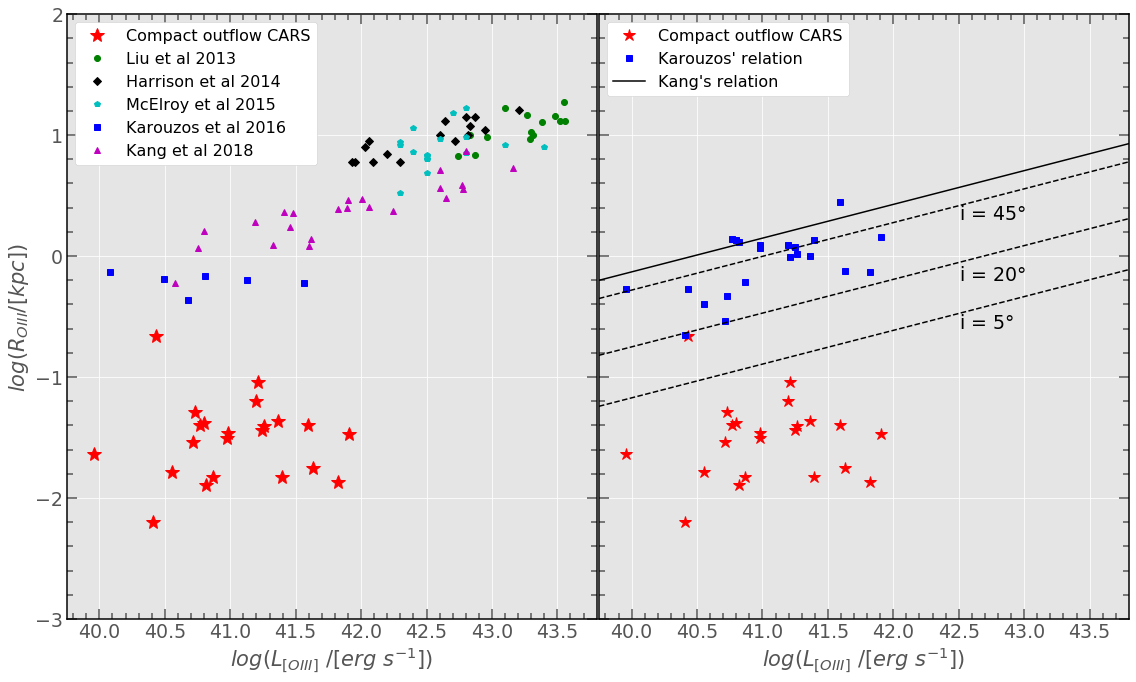

In [17]:
from matplotlib import gridspec

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
gs = gridspec.GridSpec(2,1, width_ratios=[1],height_ratios=[1,1]) 

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_axes([0.06, 0.1, 0.46, 0.84]) # main axes
ax2 = fig.add_axes([0.522, 0.1, 0.46, 0.84]) # main axes

plt.setp(ax2.get_yticklabels(), visible=False)

ax1.plot(compact_log_L_OIII_CARS,d,'r*',ms=15,label='Compact outflow CARS')
ax1.plot(log_L_OIII_liu,l,'go',label='Liu et al 2013')
ax1.plot(log_L_OIII_harrison,j,'kD',label='Harrison et al 2014')
ax1.plot(log_L_OIII_mcelroy_raw,r,'cp',label='McElroy et al 2015')
ax1.plot(log_L_OIII_karouzos_raw,p,'bs',label='Karouzos et al 2016')
ax1.plot(log_L_OIII_kang_raw,n,'m^',label='Kang et al 2018')
ax1.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel(r'$log(R_{OIII}/[kpc])$', fontsize=21)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=16, loc='upper left')
ax1.set_ylim(-3,2)
ax1.set_xlim(39.75,43.8)

ax2.plot(compact_log_L_OIII_CARS,d,'r*',ms=12,label='Compact outflow CARS')
#ax1.plot(log_L_OIII_liu,l,'go',label='Liu et al 2013')
#ax1.plot(log_L_OIII_harrison,j,'kD',label='Harrison et al 2014')
ax2.plot(compact_log_L_OIII_CARS,f,'bs',label="Karouzos' relation")
ax2.plot(log_L_OIII,b,'k-',label="Kang's relation")
ax2.plot(log_L_OIII,b1,'k--')#,label='Kang et al 2018 5 degree inclination')
ax2.plot(log_L_OIII,b2,'k--')#,label='Kang et al 2018 30 degree inclination')
ax2.plot(log_L_OIII,b3,'k--')#,label='Kang et al 2018 45 degree inclination')
ax2.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
ax2.annotate(r'i = $45\degree$',xy=(42.5,0.26),xytext=(42.5,0.3),fontsize=19)
ax2.annotate(r'i = $20\degree$',xy=(42.5,-0.26),xytext=(42.5,-0.2),fontsize=19)
ax2.annotate(r'i = $5\degree$',xy=(42.5,-0.66),xytext=(42.5,-0.6),fontsize=19)
ax2.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax2.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax2.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax2.minorticks_on()
ax2.legend(facecolor='white', framealpha=1, fontsize=16, loc='upper left')
ax2.set_ylim(-3,2)
ax2.set_xlim(39.75,43.8)

fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/outflow_size.png',overwrite=True)

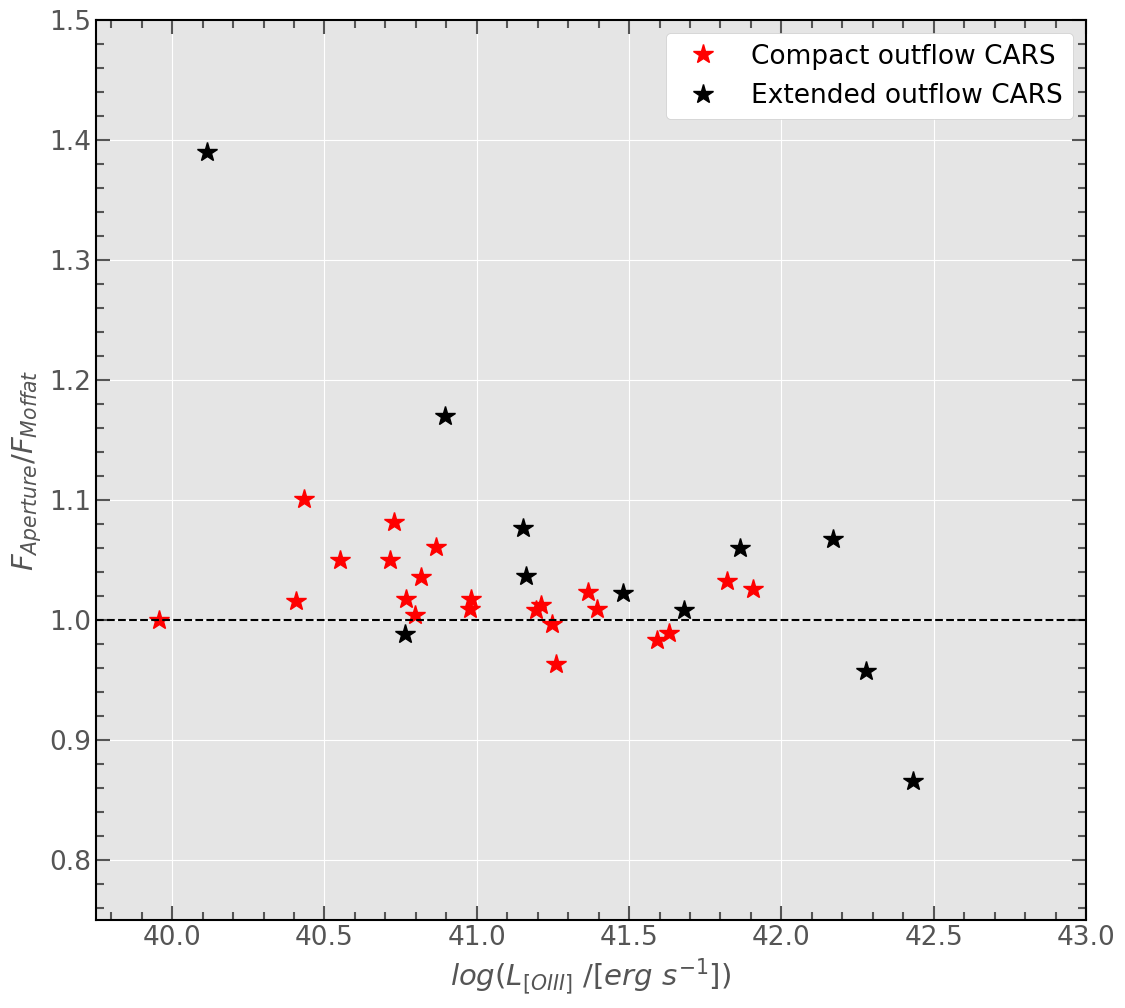

In [49]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
fig = plt.figure(figsize=(11,10)) 

ax1 = fig.add_axes([0.09, 0.087, 0.9, 0.9]) # main axes

ax1.plot(compact_log_L_OIII_CARS,compact_flux_wing_ratio,'r*',ms=15,label='Compact outflow CARS')
ax1.plot(extended_log_L_OIII_CARS,extended_flux_wing_ratio,'k*',ms=15,label='Extended outflow CARS')
ax1.axhline(y=1.0,color='k',linestyle='--')
ax1.set_xlabel(r'$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel(r'$F_{Aperture}$/$F_{Moffat}$', fontsize=21)

ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper right')

ax1.set_ylim(0.75,1.5)
ax1.set_xlim(39.75,43.0)

fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/flux_comaprison.png',overwrite=True)

In [5]:
n_e_compact = np.array([1881,2311,4989,2730])
n_e_compact_err = np.array([651,1859,1913,1012])
n_e_extended = np.array([497,775,407])
n_e_extended_err = np.array([290,52,97])
n_e = np.append(n_e_compact,n_e_extended)
n_e_err = np.append(n_e_compact_err,n_e_extended_err)

n_e_compact_avg = np.mean(n_e_compact)
n_e_compact_err_avg = np.sqrt(np.mean(n_e_compact_err**2))
n_e_extended_avg = np.mean(n_e_extended)
n_e_extended_err_avg = np.sqrt(np.mean(n_e_extended_err**2))

n_e = [n_e_compact_avg,n_e_extended_avg]
n_e_err = [n_e_compact_err_avg,n_e_extended_err_avg]
labels = [r'Compact outflows', r'Extended outflows']
x_pos = np.arange(len(labels))

print (n_e_compact_avg,n_e_compact_err_avg)
print (n_e_extended_avg,n_e_extended_err_avg)


2977.75 1463.1639518522863
559.6666666666666 179.08377927662795


In [51]:
r_compact = np.array([90,40,18,15])
r_compact_err = np.array([3,9,4,4])
r_extended = np.array([193,422,202])
r_extended_err = np.array([19.3,42.2,20.2])
r = np.append(r_compact,r_extended)
r_err = np.append(r_compact_err,r_extended_err)

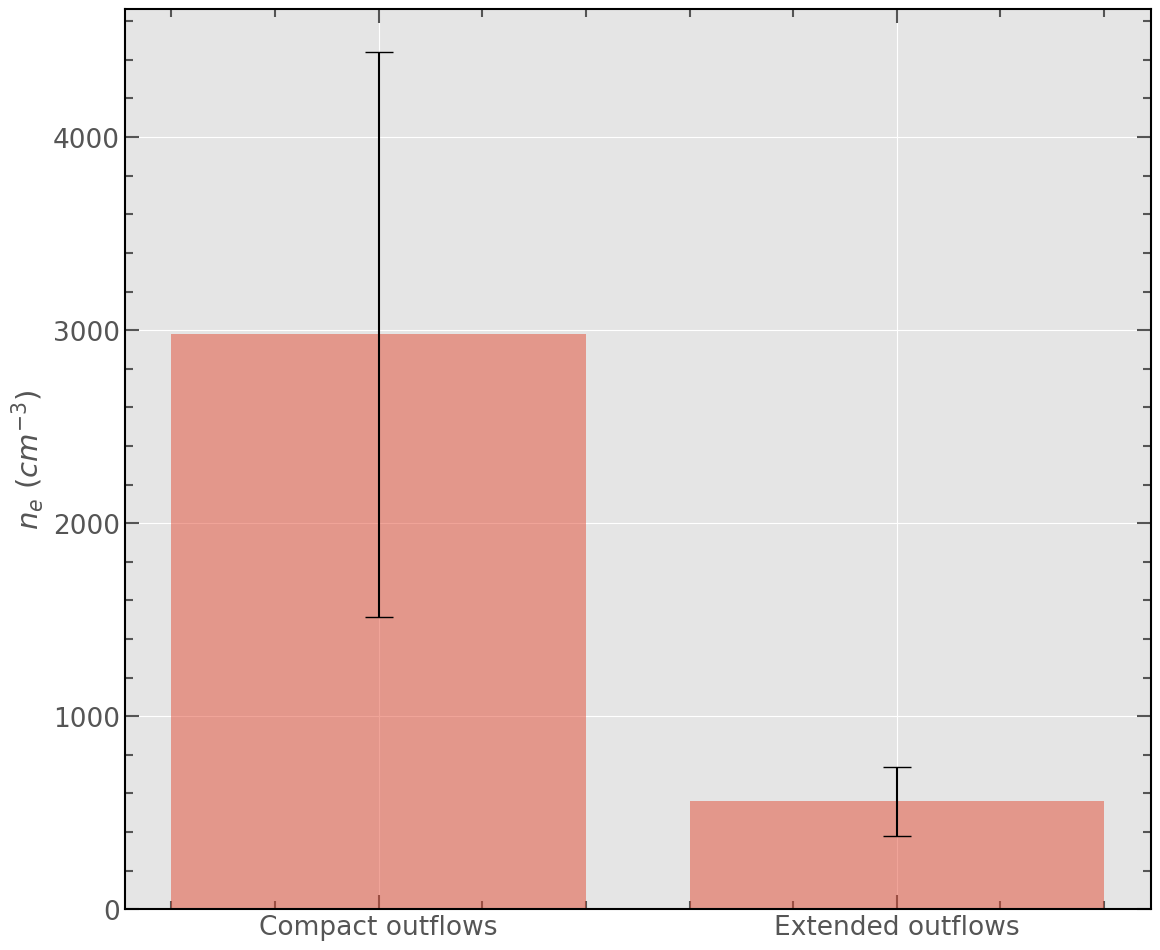

In [52]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
csfont = {'fontname':'Times New Roman'}

fig = plt.figure(figsize=(12,10)) 

ax1 = fig.add_axes([0.105, 0.07, 0.855, 0.9]) # main axes
ax1.bar(x_pos,n_e,yerr=n_e_err,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
#ax1.fill_between(r, n_e - n_e_err, n_e + n_e_err,color='gray', alpha=0.2),
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels)
ax1.set_ylabel(r'$n_{e}$ $(cm^{-3})$', fontsize=21)
#ax1.set_xlim(100,10000)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
#ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper right')
fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/electron_density_bar_plot.png',overwrite=True)

In [53]:
compact_L_Hb_mean = np.mean(compact_log_Hb_CARS)
compact_L_Hb_std = np.std(compact_log_Hb_CARS)
extended_L_Hb_mean = np.mean(extended_log_Hb_CARS)
extended_L_Hb_std = np.std(extended_log_Hb_CARS)

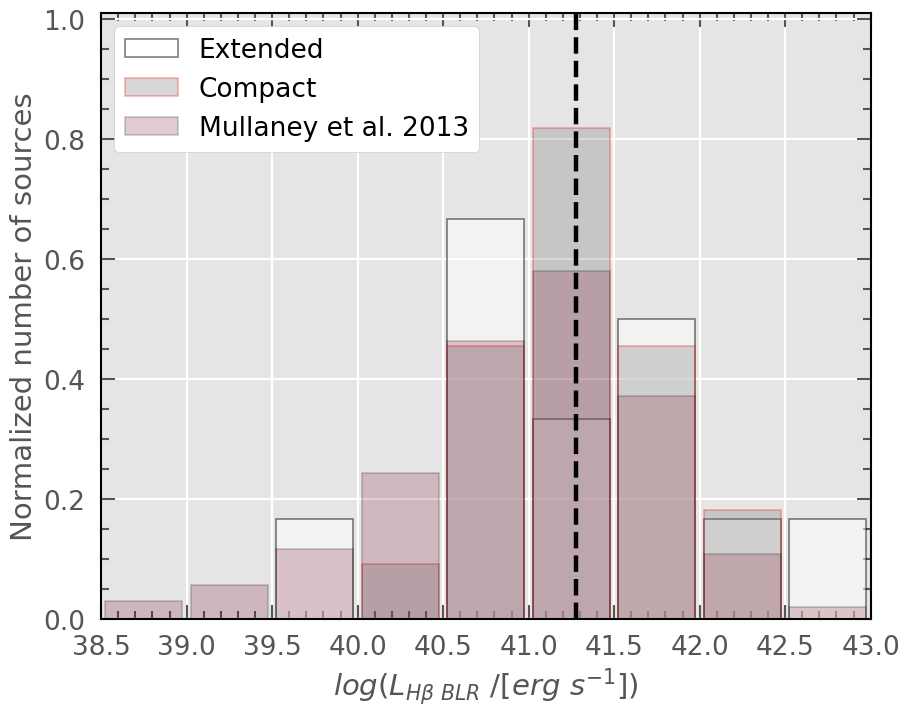

In [54]:
plt.style.use('seaborn-poster')

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
csfont = {'fontname':'Times New Roman'}

fig = plt.figure(figsize=(9,7)) 

ax1 = fig.add_axes([0.105, 0.125, 0.855, 0.865]) # main axes

ax1.hist(extended_log_Hb_CARS,bins=np.arange(38,43.5,0.5),density=1,color='w',label='Extended',alpha=0.5,edgecolor='k', linewidth=1.2,rwidth=0.9)
ax1.hist(compact_log_Hb_CARS,bins=np.arange(38,43.5,0.5),density=1,color='gray',label='Compact',alpha=0.3,edgecolor='r', linewidth=1.2,rwidth=0.9)
cm = plt.cm.RdBu

n, bins, patches = ax1.hist(log_L_Hb_blr_mullaney_good, np.arange(38,43.5,0.5),label='Mullaney et al. 2013',density=1,alpha=0.2,edgecolor='k',lw=1.2, color='green',rwidth=0.9)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/200)) # notice the i/25


plt.axvline(x=compact_L_Hb_mean,color='k',ls='--',lw=3.2,alpha=0.9999)

ax1.set_xlabel('$log(L_{H \\beta \  BLR}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel('Normalized number of sources',fontsize=21)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.set_xlim(38.5,43)
ax1.set_ylim(0,1.01)

ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper left')
fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/AGNlum_histogram.png',overwrite=True)

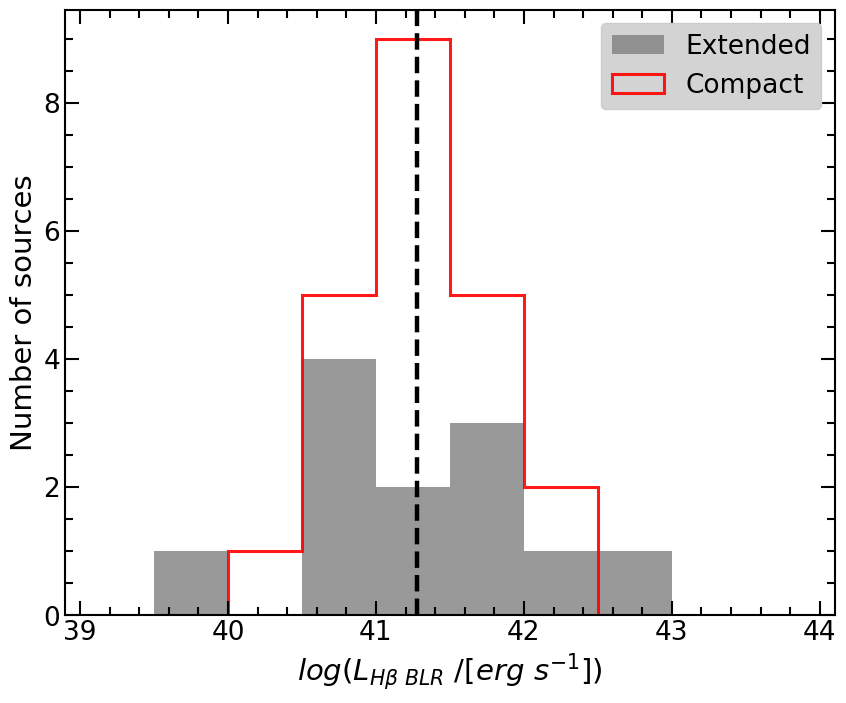

In [55]:
plt.style.use('default')

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
csfont = {'fontname':'Times New Roman'}

fig = plt.figure(figsize=(9,7)) 

ax1 = fig.add_axes([0.105, 0.125, 0.855, 0.865]) # main axes

cm = plt.cm.RdBu

#n, bins, patches = ax1.hist(log_L_Hb_blr_mullaney_good, 100,density=1,edgecolor='k',lw=0.2, color='green')
#for i, p in enumerate(patches):
#    plt.setp(p, 'facecolor', cm(i/500)) # notice the i/25

ax1.hist(extended_log_Hb_CARS,bins=np.arange(39,43.5,0.5),color='gray',label='Extended',alpha=0.8)
ax1.hist(compact_log_Hb_CARS,bins=np.arange(39,43.5,0.5),histtype='step',label='Compact',alpha=0.9,edgecolor='r', linewidth=2.2,rwidth=0.4)

plt.axvline(x=compact_L_Hb_mean,color='k',ls='--',lw=3.2,alpha=0.9999)

ax1.set_xlabel('$log(L_{H \\beta \  BLR}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel('Number of sources',fontsize=21)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.set_xlim(38.9,44.1)

ax1.legend(facecolor='lightgray', framealpha=1, fontsize=19, loc='upper right')
fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/compact_extended_AGNlum_histogram.png',overwrite=True)

In [56]:
anderson_ksamp([compact_log_Hb_CARS,extended_log_Hb_CARS])

/home/rickeythecat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value capped: true value larger than 0.25
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=-0.7362821421393511, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

In [57]:
n = 12
AD = -0.7362821421393511
a = AD*(1+(0.75/n)+(2.25/n**2))
print (a)
p = 1 - np.exp(-13.436 + 101.14*(a)- 223.73*(a)**2)
print (p)

-0.7938041844939878
1.0


In [58]:
ks_2samp(compact_log_Hb_CARS,extended_log_Hb_CARS)

Ks_2sampResult(statistic=0.1590909090909091, pvalue=0.9664416933993958)

In [59]:
R_out_kang = 1000*(10**(0.279*compact_log_L_OIII_CARS- 11.291))

In [60]:
R_out_karouzos = offset_wing_karzous

In [61]:
R_out_CARS = compact_offset_wing_mainak

In [62]:
CARS_kang_ratio_dist = R_out_kang/R_out_CARS
CARS_karouzos_ratio_dist = R_out_karouzos/R_out_CARS

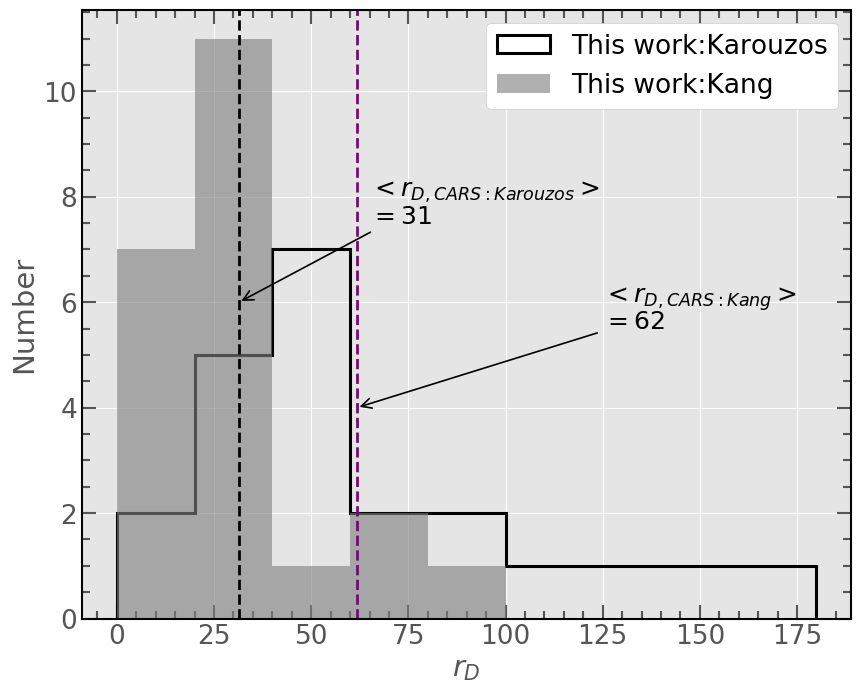

In [73]:
plt.style.use('ggplot')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
csfont = {'fontname':'Times New Roman'}

fig = plt.figure(figsize=(9,7)) 

ax1 = fig.add_axes([0.105, 0.11, 0.855, 0.87]) # main axes

cm = plt.cm.RdBu
bins1 = np.arange(0,200,20)
bins2 = np.arange(0,120,20)

n, bins, patches = ax1.hist(CARS_kang_ratio_dist,bins=bins1,histtype='step',label='This work:Karouzos',alpha=0.995,edgecolor='k', linewidth=2.2,rwidth=0.9)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/2500)) # notice the i/25

cm = plt.cm.RdBu

ax1.hist(CARS_karouzos_ratio_dist,color='gray',bins=bins2,label='This work:Kang',alpha=0.62)

plt.axvline(x=np.mean(CARS_kang_ratio_dist),color='purple',ls='--',lw=2,alpha=0.99)
plt.axvline(x=np.mean(CARS_karouzos_ratio_dist),color='k',ls='--',lw=2,alpha=0.99)

ax1.set_xlabel('$r_{D}$',fontsize=21)
ax1.set_ylabel('Number',fontsize=21)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.annotate('$<r_{D,CARS:Karouzos}>$',xy=(np.mean(CARS_karouzos_ratio_dist),6),xytext=(65,8),fontsize=18)
ax1.annotate('$=31$',xy=(np.mean(CARS_karouzos_ratio_dist),6),xytext=(65,7.5),arrowprops=dict(arrowstyle= '->',color='black',lw=1.2,connectionstyle='arc'),fontsize=18)
ax1.annotate('$<r_{D,CARS:Kang}>$',xy=(np.mean(CARS_kang_ratio_dist),4),xytext=(125,6),fontsize=18)
ax1.annotate('$=62$',xy=(np.mean(CARS_kang_ratio_dist),4),xytext=(125,5.5),arrowprops=dict(arrowstyle= '->',color='black',lw=1.2,connectionstyle='arc'),fontsize=18)

ax1.legend(facecolor='white', framealpha=1, fontsize=19, loc='upper right')
fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/energetics_with_distance.png',overwrite=True)

In [74]:
n_e_Liu_compact =np.array([1881,2311,4989,2730])/ np.array([100,100,100,100])
n_e_Liu_compact_err = np.array([651,1859,1913,1012])/ np.array([100,100,100,100])
n_e_Liu_extended = np.array([497,775,407])/np.array([10,10,10])
n_e_Liu_extended_err =np.array([290,52,97])/ np.array([10,10,10])
n_e_Liu = np.append(n_e_Liu_compact,n_e_Liu_extended)
n_e_err_Liu = np.append(n_e_Liu_compact_err,n_e_Liu_extended_err)

n_e_Liu_compact_avg = np.mean(n_e_Liu_compact)
n_e_Liu_compact_err_avg = np.sqrt(np.mean(n_e_Liu_compact_err**2))
n_e_Liu_extended_avg = np.mean(n_e_Liu_extended)
n_e_Liu_extended_err_avg = np.sqrt(np.mean(n_e_Liu_extended_err**2))

n_e_Liu = [n_e_Liu_compact_avg,n_e_Liu_extended_avg]
n_e_Liu_err = [n_e_Liu_compact_err_avg,n_e_Liu_extended_err_avg]

n_e_Husemann_compact =np.array([1881,2311,4989,2730])/ np.array([600,600,600,600])
n_e_Husemann_compact_err = np.array([651,1859,1913,1012])/ np.array([600,600,600,600])
n_e_Husemann_extended = np.array([497,775,407])/np.array([100,100,100])
n_e_Husemann_extended_err =np.array([290,52,97])/ np.array([100,100,100])
n_e_Husemann = np.append(n_e_Husemann_compact,n_e_Husemann_extended)
n_e_err_Husemann = np.append(n_e_Husemann_compact_err,n_e_Husemann_extended_err)

n_e_Husemann_compact_avg = np.mean(n_e_Husemann_compact)
n_e_Husemann_compact_err_avg = np.sqrt(np.mean(n_e_Husemann_compact_err**2))
n_e_Husemann_extended_avg = np.mean(n_e_Husemann_extended)
n_e_Husemann_extended_err_avg = np.sqrt(np.mean(n_e_Husemann_extended_err**2))

n_e_Husemann = [n_e_Husemann_compact_avg,n_e_Husemann_extended_avg]
n_e_Husemann_err = [n_e_Husemann_compact_err_avg,n_e_Husemann_extended_err_avg]


In [111]:
q = 3.3936

r_CARS = 143.7
r_Harrison = 414.2
r_Liu = 1320.7
r_Karouzos = 281.1
r_Kang = 483.6
r_McElroy = 306.0

R_out_CARS = np.log10((q*r_CARS)/1000)
R_out_Harrison = np.log10((q*r_Harrison)/1000)
R_out_Liu = np.log10((q*r_Liu)/1000)
R_out_Karouzos = np.log10((q*r_Karouzos)/1000)
R_out_Kang = np.log10((q*r_Kang)/1000)
R_out_McElroy = np.log10((q*r_McElroy)/1000)

log_L_OIII_Harrison = 42.6
log_L_OIII_Liu = 43.3
log_L_OIII_Karouzos = 40.9
log_L_OIII_Kang = 42.0
log_L_OIII_McElroy = 42.8
log_L_OIII_CARS = 41.3

In [115]:
R_out_all = np.array([R_out_Karouzos,R_out_Kang,R_out_Harrison,R_out_McElroy,R_out_Liu])
log_L_OIII_all = np.array([log_L_OIII_Karouzos,log_L_OIII_Kang,log_L_OIII_Harrison,log_L_OIII_McElroy,log_L_OIII_Liu])

In [116]:
R_out_all

array([-0.0204785 ,  0.21514694,  0.14787075,  0.01638208,  0.65146483])

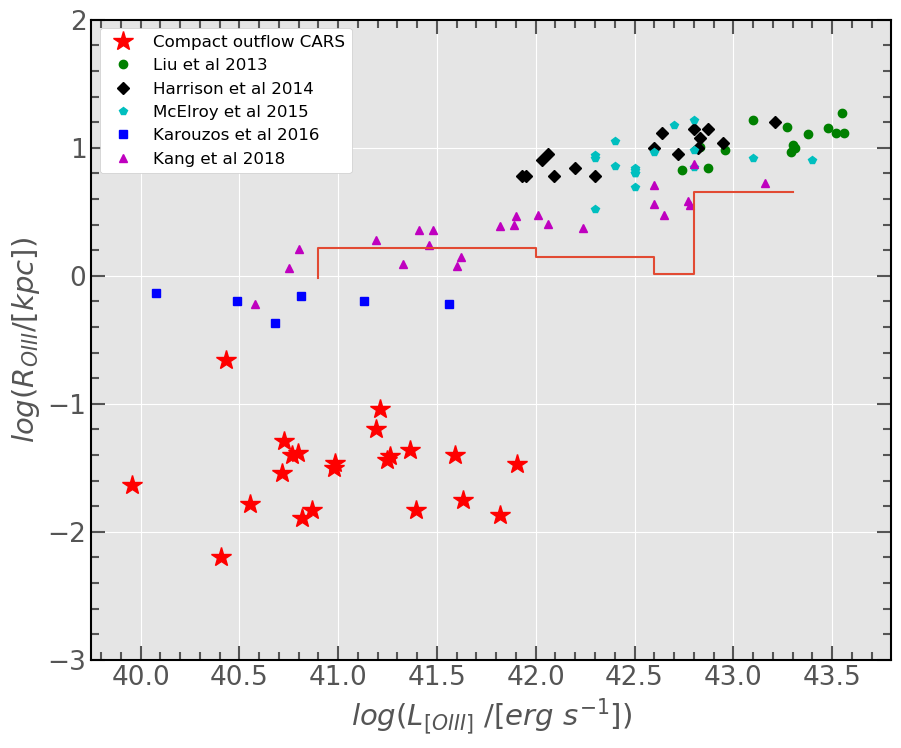

In [121]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0.06, 0.1, 0.8, 0.8]) # main axes

plt.setp(ax2.get_yticklabels(), visible=False)

ax1.plot(compact_log_L_OIII_CARS,d,'r*',ms=15,label='Compact outflow CARS')
ax1.plot(log_L_OIII_liu,l,'go',label='Liu et al 2013')
ax1.plot(log_L_OIII_harrison,j,'kD',label='Harrison et al 2014')
ax1.plot(log_L_OIII_mcelroy_raw,r,'cp',label='McElroy et al 2015')
ax1.plot(log_L_OIII_karouzos_raw,p,'bs',label='Karouzos et al 2016')
ax1.plot(log_L_OIII_kang_raw,n,'m^',label='Kang et al 2018')
ax1.step(log_L_OIII_all,R_out_all)
ax1.set_xlabel('$log(L_{[OIII]}\  /[erg\ s^{-1}]$)',fontsize=21)
ax1.set_ylabel(r'$log(R_{OIII}/[kpc])$', fontsize=21)
ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=19)
ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
ax1.minorticks_on()
ax1.legend(facecolor='white', framealpha=1, fontsize=12, loc='upper left')
ax1.set_ylim(-3,2)
ax1.set_xlim(39.75,43.8)
fig.savefig('/home/rickeythecat/Downloads/Outflow_paper1/size_luminosity_step_func',overwrite=True)

In [18]:
offset_wing_karzous

array([1243.93603516,  988.18857422,  537.92402344, 2775.16972656,
        401.81914063,  757.71699219,  744.13232422,  995.3296875 ,
        608.82651367, 1181.03554688, 1355.45283203, 1173.26152344,
       1348.64863281,  290.61721191, 1434.08925781,  221.8076416 ,
        537.21772461, 1040.05761719, 1228.2015625 ,  471.75395508,
       1372.76533203, 1315.68300781])